In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_classification

In [50]:
+X,y= make_classification(n_samples=100, n_features=2,
                         n_informative=2, n_redundant=0, 
                         n_repeated=0, n_classes=2, n_clusters_per_class=1,random_state=333)

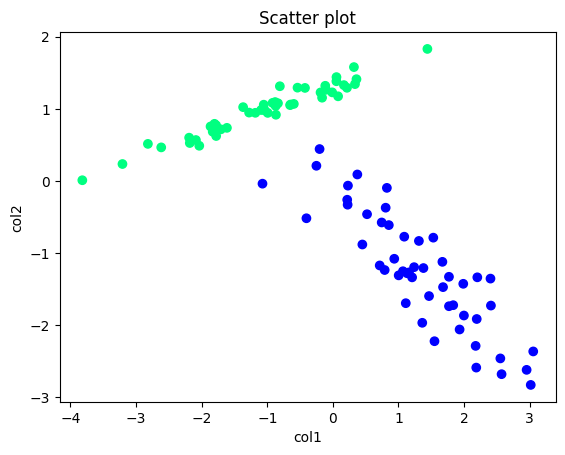

In [51]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter")
plt.xlabel("col1")
plt.ylabel("col2")
plt.title("Scatter plot")
plt.show()

In [52]:
df = pd.DataFrame(X,columns=["col1","col2"])
df['target'] = y 
df.head(10)

,col1,col2,target
0,-0.539238,1.294174,1
1,-1.707163,0.716009,1
2,-1.804838,0.792522,1
3,-0.595480,1.068427,1
4,0.054588,1.440653,1
5,-1.780287,0.772570,1
6,0.229523,-0.065169,0
7,-0.403456,-0.517885,0
8,-0.872240,1.040868,1
9,0.214607,1.292418,1


### Start with a random point and draw a line
### pick a point based on that point move that line by subtracting or adding based on point in positive and negative side.
-----
### W(n) = w(old) + learning_rate*(y(i)-y(hat))*x(i)

In [53]:
import random

In [54]:
X.shape
np.ones(X.shape[1],dtype="int")

array([1, 1])

In [93]:
class my_perceptron:
    def __init__(self,epochs=2000,lr=0.1):
        self.epochs = epochs
        self.lr = lr

    def step(self,x):
        if x>0:
            return 1
        else:
            return 0

    def return_coef(self,X,y):
        X = np.insert(X,0,1,axis=1) 
        weights = np.ones(X.shape[1])
        for i in range(self.epochs):          
            random_point = random.randint(1,X.shape[0]-1) 
            y_hat = self.step(np.dot(X[random_point],weights))
            weights = weights + self.lr * (y[random_point]-y_hat) * X[random_point]
            
        return weights[0],weights[1:]
        

In [94]:
per = my_perceptron()
intercept , coef = per.return_coef(X,y)
print(intercept)
print(coef)

-0.6999999999999998
[-0.21476565  1.20764632]


-----
##### A = coef[0]
##### B = coef[1]
##### C = intercept
##### formula    slope = -a /b 
#####           intercept = -c/b

In [95]:
slope = - (coef[0]/coef[1])
c = - (intercept/coef[1])

In [96]:
print(slope)
print(c)

0.1778381976300592
0.5796399045901133


In [97]:
x_input = np.linspace(-2,2,100)
y_input = slope * x_input + c

(-2.0, 2.0)

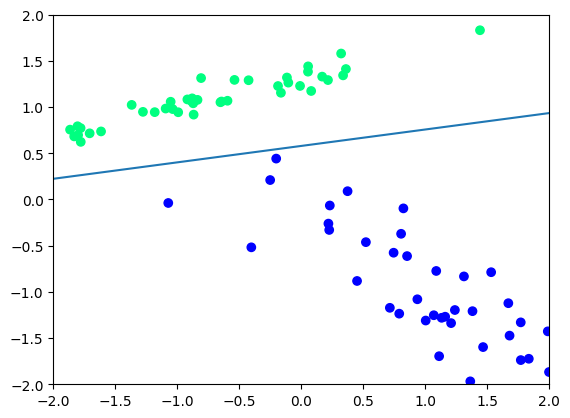

In [98]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter")
plt.plot(x_input,y_input)
plt.ylim(-2,2)
plt.xlim(-2,2)